## Text Representation with Feature Engineering

### Sample Corpus

In [ ]:
import pandas as pd
import numpy as np

pd.options.display.max_colwidth = 200

corpus = ['The sky is blue and beautiful.',
          'Love this blue and beautiful sky!',
          'The quick brown fox jumps over the lazy dog.',
          "A king's breakfast has sausages, ham, bacon, eggs, toast and beans",
          'I love green eggs, ham, sausages and bacon!',
          'The brown fox is quick and the blue dog is lazy!',
          'The sky is very blue and the sky is very beautiful today',
          'The dog is lazy but the brown fox is quick!'    
]
labels = ['weather', 'weather', 'animals', 'food', 'food', 'animals', 'weather', 'animals']

corpus = np.array(corpus)
corpus_df = pd.DataFrame({'Document': corpus, 
                          'Category': labels})
corpus_df = corpus_df[['Document', 'Category']]
corpus_df

,Document,Category
0,The sky is blue and beautiful.,weather
1,Love this blue and beautiful sky!,weather
2,The quick brown fox jumps over the lazy dog.,animals
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food
4,"I love green eggs, ham, sausages and bacon!",food
5,The brown fox is quick and the blue dog is lazy!,animals
6,The sky is very blue and the sky is very beautiful today,weather
7,The dog is lazy but the brown fox is quick!,animals


### Text Preprocessing

In [ ]:
import nltk
import re

nltk.download('stopwords')
nltk.download('punkt')

stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

norm_corpus = normalize_corpus(corpus)
norm_corpus

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


array(['sky blue beautiful', 'love blue beautiful sky',
       'quick brown fox jumps lazy dog',
       'kings breakfast sausages ham bacon eggs toast beans',
       'love green eggs ham sausages bacon',
       'brown fox quick blue dog lazy', 'sky blue sky beautiful today',
       'dog lazy brown fox quick'], dtype='<U51')

## Robust Word2Vec Model with Gensim

In [ ]:
import nltk
from gensim.models import word2vec

tokenized_corpus = [nltk.word_tokenize(doc) for doc in norm_corpus]

# Set values for various parameters
feature_size = 15    # Word vector dimensionality  
window_context = 20  # Context window size                                                                                    
min_word_count = 1   # Minimum word count                        
sample = 1e-3        # Downsample setting for frequent words
sg = 1               # skip-gram model

w2v_model = word2vec.Word2Vec(tokenized_corpus, size=feature_size, 
                              window=window_context, min_count = min_word_count,
                              sg=sg, sample=sample, iter=5000)
w2v_model

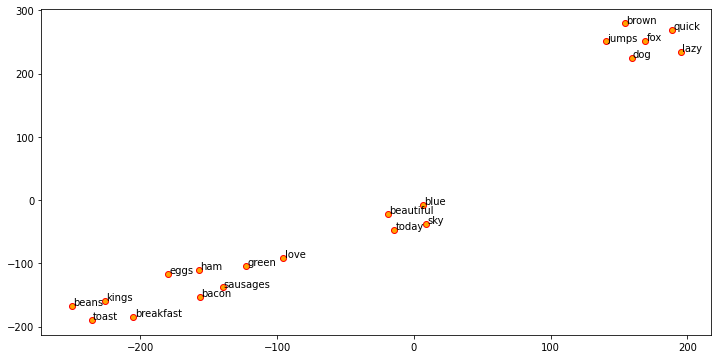

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

# visualize embeddings
from sklearn.manifold import TSNE

words = w2v_model.wv.index2word
wvs = w2v_model.wv[words]

tsne = TSNE(n_components=2, random_state=42, n_iter=5000, perplexity=5)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

In [ ]:
w2v_model.wv['blue'], w2v_model.wv['blue'].shape

(array([-0.19277585,  0.5633339 , -0.10093893,  0.5113408 , -0.03923651,
        -0.12643442,  0.49004558,  0.38298056,  0.35778138, -0.54033977,
         0.7124794 ,  0.68817854,  0.11190586,  0.33759972,  0.95923394],
       dtype=float32), (15,))

In [ ]:

vec_df = pd.DataFrame(wvs, index=words)
vec_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
sky,0.056114,1.001604,-0.093761,0.796504,-0.220666,0.108489,0.994327,0.044012,0.631343,-0.398062,0.781560,1.078817,-0.109163,0.711785,1.298424
blue,-0.192776,0.563334,-0.100939,0.511341,-0.039237,-0.126434,0.490046,0.382981,0.357781,-0.540340,0.712479,0.688179,0.111906,0.337600,0.959234
beautiful,0.081868,0.782187,-0.306744,0.931030,0.097836,0.087551,0.870947,-0.099222,0.468010,-0.364373,0.780855,0.940347,-0.259555,0.665849,1.141862
quick,0.088748,-0.340980,-0.034175,0.374683,-0.046834,-1.105116,0.369050,1.066597,-0.426802,-1.271646,0.877915,0.823098,0.396371,0.543459,0.393766
brown,0.225398,-0.477230,-0.147366,-0.118637,-0.278622,-1.240426,0.412642,0.795193,-0.276973,-1.228342,0.887505,0.859517,0.540962,0.265543,0.879957
fox,0.004059,-0.448078,-0.072754,0.258835,-0.193370,-1.000836,0.461733,1.118001,-0.377364,-1.369961,0.748718,0.825939,0.484736,0.673974,0.503519
lazy,0.076733,-0.516685,-0.324899,0.048746,-0.043689,-1.268416,0.337659,0.965217,-0.580689,-1.126377,0.856559,0.782154,0.224447,0.220649,0.930432
dog,0.269003,-0.286198,0.018098,0.244388,-0.147095,-1.217208,0.302468,0.874426,-0.330022,-1.373724,0.809482,0.763785,0.467598,0.612582,0.470832
love,-0.094520,0.377033,0.395003,0.538549,0.057861,0.147909,1.093729,-0.564345,0.056852,0.097834,0.239637,0.619610,-0.165343,0.182994,0.273388
sausages,-0.182775,-0.453195,0.775730,-0.037753,0.062224,-0.034961,1.401832,-1.082473,-0.316771,-0.008009,0.500651,0.906346,-0.542767,0.029209,0.163522


### Term semantic similarity

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(vec_df.values)
similarity_df = pd.DataFrame(similarity_matrix, index=words, columns=words)
similarity_df

,sky,blue,beautiful,quick,brown,fox,lazy,dog,love,sausages,ham,bacon,eggs,jumps,kings,breakfast,toast,beans,green,today
sky,1.000000,0.933401,0.977991,0.424120,0.426761,0.432053,0.386539,0.426436,0.717245,0.353577,0.354065,0.330127,0.335064,0.322074,0.132883,0.185205,0.126135,0.169088,0.426055,0.981921
blue,0.933401,1.000000,0.909701,0.635417,0.628852,0.638664,0.608099,0.622950,0.530934,0.213980,0.229357,0.203524,0.224804,0.551544,0.076146,0.097091,0.067318,0.095604,0.289146,0.928075
beautiful,0.977991,0.909701,1.000000,0.418999,0.398516,0.413190,0.389979,0.410981,0.723404,0.371372,0.371793,0.362638,0.353370,0.306714,0.145235,0.200001,0.137044,0.188889,0.490894,0.971224
quick,0.424120,0.635417,0.418999,1.000000,0.941424,0.989847,0.946617,0.987694,0.094196,0.114957,0.129917,0.153497,0.137462,0.977665,0.252928,0.203178,0.242387,0.220116,0.124609,0.409864
brown,0.426761,0.628852,0.398516,0.941424,1.000000,0.947618,0.972159,0.958720,0.066154,0.159723,0.106047,0.134683,0.119559,0.973616,0.226204,0.216645,0.237606,0.213952,0.081183,0.399500
fox,0.432053,0.638664,0.413190,0.989847,0.947618,1.000000,0.941138,0.981705,0.085435,0.111419,0.114182,0.134044,0.115197,0.977948,0.246745,0.200237,0.236175,0.216432,0.085150,0.417490
lazy,0.386539,0.608099,0.389979,0.946617,0.972159,0.941138,1.000000,0.939930,0.030918,0.130244,0.085384,0.124585,0.116405,0.970556,0.229832,0.216242,0.235694,0.218175,0.084985,0.382299
dog,0.426436,0.622950,0.410981,0.987694,0.958720,0.981705,0.939930,1.000000,0.078071,0.107961,0.101565,0.138255,0.107033,0.976051,0.217860,0.191619,0.215994,0.190230,0.094913,0.398451
love,0.717245,0.530934,0.723404,0.094196,0.066154,0.085435,0.030918,0.078071,1.000000,0.796243,0.765199,0.787277,0.778794,0.017875,0.603359,0.636471,0.591837,0.628695,0.830522,0.737840
sausages,0.353577,0.213980,0.371372,0.114957,0.159723,0.111419,0.130244,0.107961,0.796243,1.000000,0.942546,0.961669,0.939934,0.141204,0.896218,0.928085,0.911239,0.923191,0.909786,0.340237


In [ ]:
feature_names = np.array(words)
similarity_df.apply(lambda row: feature_names[np.argsort(-row.values)[1:4]], 
                    axis=1)

sky            [today, beautiful, blue]
blue            [sky, today, beautiful]
beautiful            [sky, today, blue]
quick                 [fox, dog, jumps]
brown                [jumps, lazy, dog]
fox                 [quick, dog, jumps]
lazy              [brown, jumps, quick]
dog                 [quick, fox, jumps]
love           [green, sausages, bacon]
sausages             [bacon, ham, eggs]
ham             [eggs, sausages, bacon]
bacon        [sausages, ham, breakfast]
eggs             [ham, sausages, beans]
jumps                 [fox, quick, dog]
kings         [toast, beans, breakfast]
breakfast         [beans, toast, kings]
toast         [kings, beans, breakfast]
beans         [kings, toast, breakfast]
green            [ham, bacon, sausages]
today            [sky, beautiful, blue]
dtype: object

## FastText Model with Gensim

In [ ]:
from gensim.models.fasttext import FastText

# Set values for various parameters
feature_size = 15    # Word vector dimensionality  
window_context = 20  # Context window size                                                                                    
min_word_count = 1   # Minimum word count                        
sample = 1e-3        # Downsample setting for frequent words
sg = 1               # skip-gram model

ft_model = FastText(tokenized_corpus, size=feature_size, 
                     window=window_context, min_count = min_word_count,
                     sg=sg, sample=sample, iter=5000)
ft_model

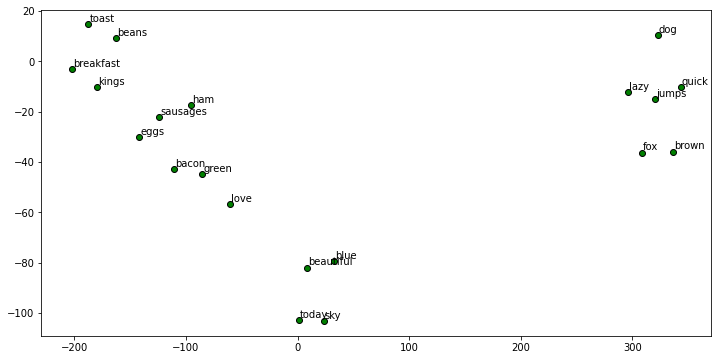

In [ ]:
# visualize embeddings
from sklearn.manifold import TSNE

words = ft_model.wv.index2word
wvs = ft_model.wv[words]

tsne = TSNE(n_components=2, random_state=42, n_iter=5000, perplexity=5)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='green', edgecolors='k')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

In [ ]:
ft_model.wv['blue'], ft_model.wv['blue'].shape

(array([-0.6971254 ,  1.036201  , -0.20005088,  0.01013497, -0.5268641 ,
        -0.39421728, -0.2792136 ,  0.05475239, -0.21168076,  0.33583555,
         0.1962164 ,  0.64243007, -0.46523207,  0.09997229, -0.08004124],
       dtype=float32), (15,))

In [ ]:
print(ft_model.wv.similarity(w1='ham', w2='sky'))
print(ft_model.wv.similarity(w1='ham', w2='sausages'))

0.38875625
0.96545506


In [ ]:
st1 = "dog fox ham"
print('Odd one out for [',st1, ']:',  
      ft_model.wv.doesnt_match(st1.split()))

st2 = "bacon ham sky sausages"
print('Odd one out for [',st2, ']:', 
      ft_model.wv.doesnt_match(st2.split()))

Odd one out for [ dog fox ham ]: ham
Odd one out for [ bacon ham sky sausages ]: sky


/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


### Document level embeddings

In [ ]:
def average_word_vectors(words, model, vocabulary, num_features):
    
    feature_vector = np.zeros((num_features,),dtype="float64")
    nwords = 0.
    
    for word in words:
        if word in vocabulary: 
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model.wv[word])
    
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
        
    return feature_vector


def averaged_word_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index2word)
    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)

In [ ]:
# get document level embeddings
ft_doc_features = averaged_word_vectorizer(corpus=tokenized_corpus, model=ft_model,
                                             num_features=feature_size)
pd.DataFrame(ft_doc_features)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-1.017834,1.219471,-0.471404,0.100632,-0.485411,-0.580870,-0.183611,-0.032766,-0.266565,0.289460,0.074620,0.748789,-0.517958,0.038283,-0.297274
1,-1.051389,0.996752,-0.461333,0.187398,-0.399002,-0.535357,-0.133190,-0.102741,-0.235152,0.255751,0.070397,0.575714,-0.376731,0.007694,-0.241070
2,-0.080685,1.394714,1.015425,0.091486,-1.111383,-0.360878,-0.166006,0.346778,-0.375867,0.003422,0.676978,-0.001734,-0.380349,0.563245,0.395930
3,-1.443467,0.329564,-0.008377,1.037905,-0.312026,-0.233052,0.184552,-0.440906,-0.320137,-0.371566,0.666171,-0.895322,0.647324,-0.199162,-0.239623
4,-1.307474,0.324607,-0.140498,0.826300,-0.173477,-0.265190,0.072099,-0.486643,-0.283610,-0.157870,0.412292,-0.508161,0.427139,-0.166446,-0.225815
5,-0.189542,1.352578,0.803024,0.068530,-1.020865,-0.378753,-0.193295,0.301214,-0.350197,0.057726,0.584805,0.126631,-0.409361,0.484519,0.307555
6,-1.085396,1.229123,-0.536072,0.100034,-0.476581,-0.611018,-0.181043,-0.026112,-0.259882,0.283033,0.046487,0.772775,-0.532793,0.030967,-0.318839
7,-0.088025,1.415853,1.003639,0.080209,-1.119665,-0.375660,-0.176112,0.350506,-0.377900,0.002104,0.662523,0.023472,-0.398187,0.561428,0.385074


### Document clustering

In [ ]:
from sklearn.cluster import AffinityPropagation

ap = AffinityPropagation()
ap.fit(ft_doc_features)

cluster_labels = ap.labels_
cluster_labels = pd.DataFrame(cluster_labels, 
                              columns=['ClusterLabel'])

pd.concat([corpus_df, cluster_labels], axis=1)

,Document,Category,ClusterLabel
0,The sky is blue and beautiful.,weather,0
1,Love this blue and beautiful sky!,weather,0
2,The quick brown fox jumps over the lazy dog.,animals,2
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food,1
4,"I love green eggs, ham, sausages and bacon!",food,1
5,The brown fox is quick and the blue dog is lazy!,animals,2
6,The sky is very blue and the sky is very beautiful today,weather,0
7,The dog is lazy but the brown fox is quick!,animals,2


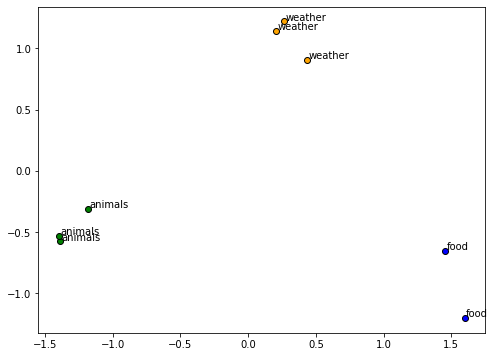

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
pcs = pca.fit_transform(ft_doc_features)
labels = ap.labels_
categories = list(corpus_df['Category'])
plt.figure(figsize=(8, 6))

for i in range(len(labels)):
    label = labels[i]
    color = 'orange' if label == 0 else 'blue' if label == 1 else 'green'
    annotation_label = categories[i]
    x, y = pcs[i]
    plt.scatter(x, y, c=color, edgecolors='k')
    plt.annotate(annotation_label, xy=(x+1e-2, y+1e-2), xytext=(0, 0), 
                 textcoords='offset points')